In [27]:
#using titanic machine learning from disaster to predict items I'll save in case of a house fire

import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
import sklearn.ensemble as ske
import tensorflow as tf

In [28]:
wardrobe_df = pd.read_csv("wardrobe.csv")
wardrobe_df.head()

,Brand,Category,Type,Color,Size,YearBought,Price,Retailer,Age,Take,ByRotation,Class,Brand Count
0,Gucci,Shoes,Loafers,Black,39.0,2021,595.0,Farfetch,2,1,Investment,Mid,0.166667
1,Gucci,Shoes,Loafers,White,39.0,2019,515.0,Gucci,4,1,Investment,Mid,0.166667
2,Saint Laurent,Shoes,Loafers,Pink,39.0,2021,645.0,Saint Laurent,2,0,Investment,Mid,0.500000
3,LK Bennett,Shoes,Flats,Black,39.0,2018,100.0,LK Bennett,5,0,Personal,Low,0.333333
4,Bottega Veneta,Shoes,Mules,Purple,39.0,2022,620.0,Harrods,1,0,Investment,Mid,0.333333


- take = will I save in a house fire (0 = no; 1 = yes)
- byrotation = can item be considered an investment or not
- class = prices classified
- age = how long have I had item in my closet

In [29]:
wardrobe_df['Take'].mean()

0.5461538461538461

after randomly choosing based on how much I wear item and sentimental value it seems I'll save half of my wardrobe

In [31]:
#grouping by class stats
w1 = wardrobe_df.groupby('Class').mean()
w1.drop(['Size','YearBought','Brand Count'],axis=1)

,Price,Age,Take
Class,,,
High,1480.444444,2.222222,0.777778
Low,70.578052,3.620253,0.430380
Mid,401.290476,2.500000,0.714286


In [32]:
#grouping by class and by rotation stats
w2 = wardrobe_df.groupby(['Class','ByRotation']).mean()
w2.drop(['Size','YearBought','Brand Count'],axis=1)

Price       Age      Take
Class ByRotation                                 
High  Investment  1553.000000  2.000000  0.875000
      Personal     900.000000  4.000000  0.000000
Low   Investment   116.598000  2.400000  0.400000
      Personal      67.382222  3.702703  0.432432
Mid   Investment   470.739130  2.565217  0.652174
      Personal     317.221053  2.421053  0.789474

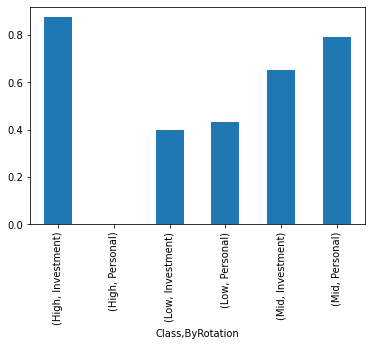

In [33]:
w2['Take'].plot.bar()

I'm most likely to save an item if it cost a lot and if it's considered an investement

# Machine Learning

In [47]:
from sklearn import tree
import sklearn.ensemble as ske
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder          
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_validate

In [35]:
wardrobe_df.count()

Brand          130
Category       130
Type           130
Color          130
Size            93
YearBought     130
Price          128
Retailer       130
Age            130
Take           130
ByRotation     130
Class          130
Brand Count    130
dtype: int64

In [36]:
#dropping non-categorical columns to make machine readable
wardrobe_df1 = wardrobe_df.drop(['Brand', 'Type', 'Color', 'Size', 'YearBought', 'Retailer', 'Brand Count'], axis=1)

#dropping missing values for price since important in being saved
wardrobe_df1 = wardrobe_df1.dropna()
wardrobe_df1.count()

Category      128
Price         128
Age           128
Take          128
ByRotation    128
Class         128
dtype: int64

In [42]:
def preprocess_wardrobe_df1(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.ByRotation = le.fit_transform(processed_df.ByRotation)
    processed_df.Category = le.fit_transform(processed_df.Category)
    processed_df.Class = le.fit_transform(processed_df.Class)

    return processed_df

In [43]:
processed_df = preprocess_wardrobe_df1(wardrobe_df1)

In [44]:
X = processed_df.drop(['Take'], axis=1).values
y = processed_df['Take'].values

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

In [51]:
dt = DecisionTreeClassifier(max_depth=3)
dt_model = dt.fit(x_train, y_train)

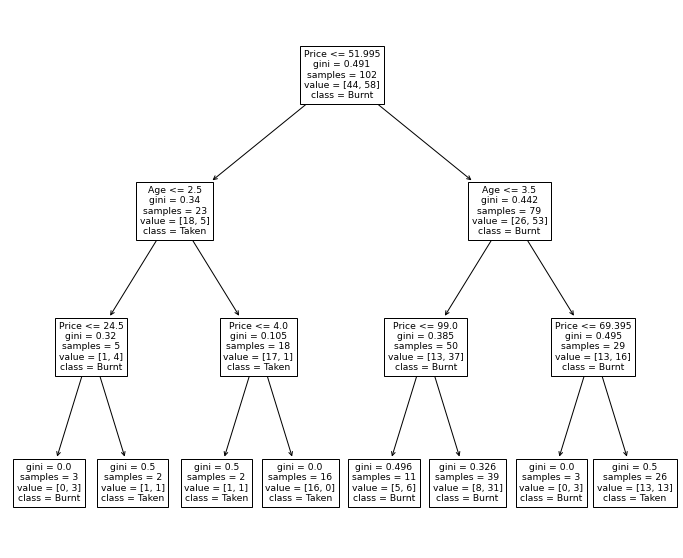

In [56]:
#decision tree
fig = plt.figure(figsize=(12, 10))
tree.plot_tree(dt_model, feature_names=['Category', 'Price', 'Age', 'ByRotation', 'Class'], class_names=['Taken', 'Burnt'])
plt.show()

In [57]:
print("Accuracy score on Testing set: ", dt_model.score(x_test, y_test))

Accuracy score on Testing set:  0.6538461538461539
